In [1]:
# PROCESS THE GLOBULAR CLUSTER STARS CATAOLOG:
# https://zenodo.org/records/4549398
#
#
# ZACK REEVES
# CREATED: 2024
#
# VERSIONS:
#  1.1  JAN 2024 CREATE JUPYTER NOTEBOOK

In [2]:
# Define the metadata for the data set. 
metadata = {}

metadata['project'] = 'Digital Universe Atlas'
metadata['sub_project'] = 'Globular Cluster Stars'

metadata['catalog'] = 'Catalogue of stars in Milky Way globular clusters from Gaia EDR3 (Vasiliev+, 2021)'
metadata['author'] = 'Vasiliev+'
metadata['prepared_by'] = 'Zack Reeves (AMNH)'
metadata['version'] = '1.1'

metadata['dir'] = metadata['sub_project'].replace(' ', '_').lower()
metadata['raw_data_dir'] = ''

metadata['data_group_title'] = 'Globular Cluster Stars'
metadata['data_group_desc'] = 'Globular Cluster Star catalog'
metadata['fileroot'] = 'gcs'

In [9]:
import pandas as pd
import numpy as np
import sys
import os
import collections

from astropy.io import ascii
import astropy.units as u
import astropy.coordinates
from astropy.table import unique, vstack, Table

from astroquery.gaia import Gaia

sys.path.insert(0, '..')
from common import file_functions, calculations

from matplotlib import pyplot as plt, colors

In [4]:
#download data from https://zenodo.org/records/4549398

In [5]:
#reading in the data

#data are downloaded in a .zip file.  Once extracted, the stars associated with each cluster are stored in folders
#named by the cluster.  We combine each of these folders into one table with an appended column describing the
#cluster

#iterate through files in catalogues directory and stack

directory_str = 'raw_data/clusters/catalogues/'
directory = os.fsencode(directory_str)
    
tables=[]
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.endswith(".txt"):
        #reading in the table
        table = ascii.read(directory_str+filename)
        #adding a column with the cluster name
        table['cluster_name'] = table.Column(data=[filename[:len(filename)-4]]*len(table),
                                             meta = collections.OrderedDict([('ucd', 'meta.name.cluster')]),
                                             description='Name of associated Globular Cluster')
        #adding table to array for stacking
        tables.append(table)

In [54]:
#combining tables in tables array
data = vstack(tables)
data

source_id,ra,dec,x,y,plx,pmra,pmdec,plxe,pmrae,pmdece,pmcorr,g_mag,bp_rp,qflag,memberprob,cluster_name
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,str15
4061099905856448640,265.89028,-26.260536,-0.0319,-0.038,-1.2989,4.5868,0.6804,0.6658,0.8421,0.4172,0.3413,19.9038,nan,0,0.0,Pal_6
4061099901464585600,265.893652,-26.26247,-0.0289,-0.04,0.0679,-1.2504,1.1779,0.1059,0.1148,0.0673,0.306,16.9928,2.6678,1,0.0,Pal_6
4061099905824621440,265.89373,-26.261994,-0.0288,-0.0395,1.2889,-1.6526,1.5607,0.9233,1.0319,0.5829,0.3863,20.1845,nan,0,0.0,Pal_6
4061099905824608256,265.894464,-26.26215,-0.0281,-0.0397,0.813,5.8136,-0.7642,0.6132,0.8161,0.4178,0.515,19.7439,2.6454,0,0.0,Pal_6
4061099905824667264,265.8922,-26.26064,-0.0302,-0.0381,-0.3771,-2.7018,-6.4447,0.5729,0.67,0.3588,0.3689,19.7012,nan,0,0.0,Pal_6
4061099905824677504,265.892217,-26.26009,-0.0301,-0.0376,-0.2822,-0.1724,-1.5015,0.1673,0.1803,0.1072,0.2799,18.0677,2.6741,0,0.0,Pal_6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5932641800735066368,242.66848,-53.808635,0.0257,-0.0598,0.4036,-3.3361,-4.8417,0.0524,0.0609,0.0456,-0.0088,16.3329,1.1275,3,0.0,FSR_1716
5932641800719385856,242.669882,-53.809369,0.0265,-0.0605,1.5577,-4.5898,-2.5897,0.7437,0.8692,0.5802,0.1929,20.0783,1.6248,2,0.0,FSR_1716


In [55]:
#renaming columns 'x' and 'y' to not be confused with cartesian x and y and adding clarification
data.rename_column('x', 'cluster_x')
data['cluster_x'].description ='X coordinate centered on cluster'
data.rename_column('y', 'cluster_y')
data['cluster_y'].description ='Y coordinate centered on cluster'

#removing rows with parallax <=0.0
data.remove_rows(np.where(data['plx']<=0.0)[0])

In [56]:
#fixing parallax units
data['plx'].unit=u.mas

#fixing RA/Dec units
data['ra'].unit=u.deg
data['dec'].unit=u.deg

In [57]:
#calculating distance in light years and parsecs
calculations.get_distance(data, parallax='plx', use='parallax')

In [58]:
#calculating cartesian coordinates
calculations.get_cartesian(data, ra='ra', dec='dec', pmra='pmra', pmde='pmdec', frame='icrs')

<function matplotlib.pyplot.show(close=None, block=None)>

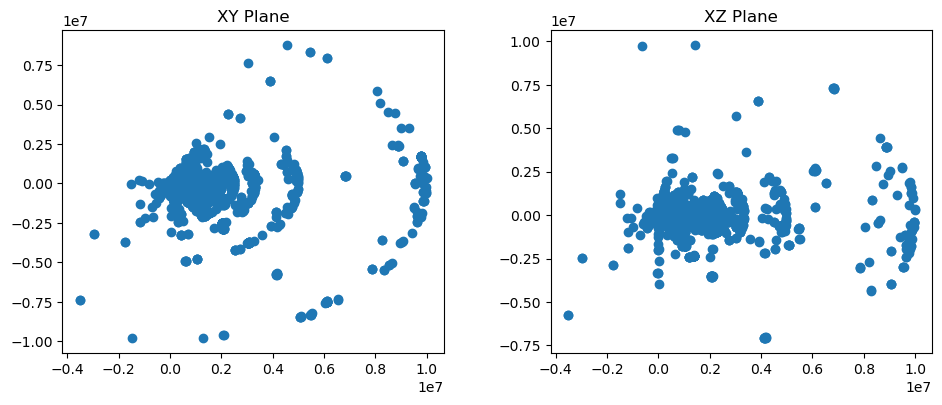

In [59]:
#2D Visualization
fig, ax = plt.subplots(1, 2)

#XY Plane
ax[0].scatter(data['x'], data['y'])
ax[0].set_title('XY Plane')

#XZ Plane
ax[1].scatter(data['x'], data['z'])
ax[1].set_title('XZ Plane')

#set good spacing
fig.tight_layout()
fig.set_size_inches(10, 4, forward=True)
plt.show

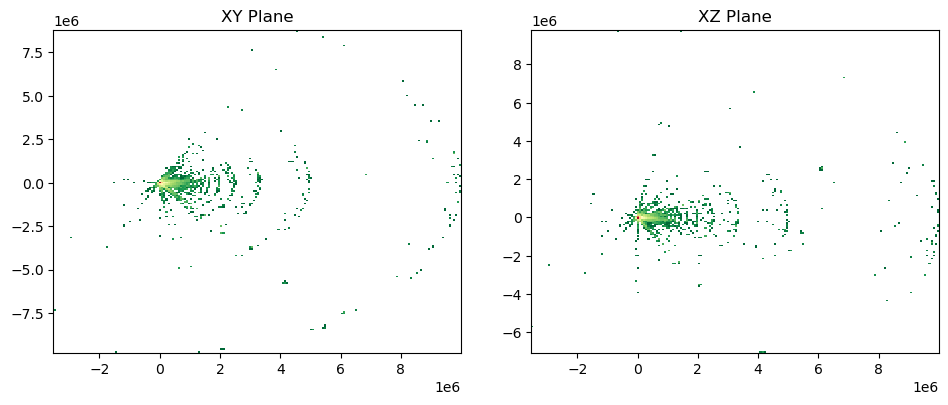

In [60]:
#2D Density Visualization
fig, ax = plt.subplots(1, 2)

#XY Plane
ax[0].hist2d(data['x'], data['y'], 
           bins = 200,  
           norm = colors.LogNorm(),  
           cmap = "RdYlGn_r",) 
ax[0].set_title('XY Plane')

#XZ Plane
ax[1].hist2d(data['x'], data['z'], 
           bins = 200,  
           norm = colors.LogNorm(),  
           cmap = "RdYlGn_r",) 
ax[1].set_title('XZ Plane')

#set good spacing
fig.tight_layout()
fig.set_size_inches(10, 4, forward=True)
#plt.show

In [61]:
data

source_id,ra,dec,cluster_x,cluster_y,plx,pmra,pmdec,plxe,pmrae,pmdece,pmcorr,g_mag,bp_rp,qflag,memberprob,cluster_name,dist_pc,dist_ly,x,y,z
,deg,deg,,,mas,,,,,,,,,,,,pc,lyr,pc,pc,pc
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,str15,float64,float64,float64,float64,float64
4061099901464585600,265.893652,-26.26247,-0.0289,-0.04,0.0679,-1.2504,1.1779,0.1059,0.1148,0.0673,0.306,16.9928,2.6678,1,0.0,Pal_6,14727.540501,48034.8,14711.047603,524.761253,458.424754
4061099905824621440,265.89373,-26.261994,-0.0288,-0.0395,1.2889,-1.6526,1.5607,0.9233,1.0319,0.5829,0.3863,20.1845,nan,0,0.0,Pal_6,775.855381,2530.5,774.986232,27.650707,24.152652
4061099905824608256,265.894464,-26.26215,-0.0281,-0.0397,0.813,5.8136,-0.7642,0.6132,0.8161,0.4178,0.515,19.7439,2.6454,0,0.0,Pal_6,1230.012300,4011.8,1228.634650,43.840969,38.276934
4061099905824637696,265.89431,-26.260626,-0.0283,-0.0381,0.4975,1.655,2.2802,0.583,0.5211,0.3076,0.0499,18.5117,nan,0,0.0,Pal_6,2010.050251,6555.9,2007.796403,71.686566,62.583181
4061099734025422464,265.920048,-26.272153,-0.0052,-0.0497,7.7837,-24.023,-45.391,0.1083,0.1318,0.0756,0.4166,17.3837,0.2795,1,0.0,Pal_6,128.473605,419.0,128.331147,4.587055,3.942447
4061099734025388288,265.922281,-26.272314,-0.0032,-0.0498,0.6817,1.9094,-0.2632,0.3641,0.3896,0.2276,0.3342,18.8193,nan,0,0.0,Pal_6,1466.920933,4784.5,1465.294904,52.398712,44.969347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5932641800735066368,242.66848,-53.808635,0.0257,-0.0598,0.4036,-3.3361,-4.8417,0.0524,0.0609,0.0456,-0.0088,16.3329,1.1275,3,0.0,FSR_1716,2477.700694,8081.2,2139.571415,-1247.445915,-71.509281


In [62]:
#construct a speck comment column
data['speck_label'] = data.Column(data=['#__'+str(name) for name in data['source_id']], 
                                  meta=collections.OrderedDict([('ucd', 'meta.id')]),
                                  description='Gaia EDR3 Source ID')

#construct a label column
data['label'] = ['GaiaEDR3_'+ str(source) for source in data['source_id']]  #leaving for now in case we want to add other labels

In [63]:
#construct a metadata table
columns = file_functions.get_metadata(data, columns=['x', 'y', 'z', 'dist_ly', 'cluster_name', 'speck_label'])
columns

,name,unit,datatype,width,precision,arraysize,ucd,description
0,x,pc,float64,,6,,pos.cartesian.x,Position (x coordinate) in pc
1,y,pc,float64,,6,,pos.cartesian.y,Position (y coordinate) in pc
2,z,pc,float64,,6,,pos.cartesian.z,Position (z coordinate) in pc
3,dist_ly,lyr,float64,,1,,pos.distance,Distance from Sun (lyr)
4,cluster_name,,str,,,*,meta.name.cluster,Name of associated Globular Cluster
5,speck_label,,str,,,*,meta.id,Gaia EDR3 Source ID


In [64]:
# Print the speck file using the to_speck function in file_functions
file_functions.to_speck(metadata, Table.to_pandas(data), columns)

In [65]:
# Print the label file using the to_label function in file_functions
file_functions.to_label(metadata, Table.to_pandas(data))